# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['city']['coord']['lat']
        city_lng = city_weather['city']['coord']['lon']
        city_max_temp = city_weather['list'][0]['main']['temp_max']
        city_humidity = city_weather['list'][0]['main']['humidity']
        city_clouds = city_weather['list'][0]['clouds']['all']
        city_wind = city_weather['list'][0]['wind']['speed']
        city_country = city_weather['city']['country']
        city_date = city_weather['list'][0]['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | perryville
Processing Record 2 of Set 1 | tralee
Processing Record 3 of Set 1 | chonchi
Processing Record 4 of Set 1 | queanbeyan
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | abong mbang
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | kerikeri
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | nobres
Processing Record 16 of Set 1 | bonthe
Processing Record 17 of Set 1 | chernyakhovsk
Processing Record 18 of Set 1 | conceicao da barra
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | magdagachi
Processing Record 21 of Set 1 | aasiaat
Processing Record 22 of Set 1 | guane
Processing Record 23 

Processing Record 43 of Set 4 | lihue
Processing Record 44 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 45 of Set 4 | elverum
Processing Record 46 of Set 4 | sao joao da barra
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | olean
Processing Record 49 of Set 4 | hayma'
City not found. Skipping...
Processing Record 0 of Set 5 | bamboo flat
Processing Record 1 of Set 5 | key west
Processing Record 2 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 3 of Set 5 | namibe
Processing Record 4 of Set 5 | saipan
Processing Record 5 of Set 5 | sisimiut
Processing Record 6 of Set 5 | vila velha
Processing Record 7 of Set 5 | coquimbo
Processing Record 8 of Set 5 | aykhal
Processing Record 9 of Set 5 | mermoz boabab
Processing Record 10 of Set 5 | takamaka
City not found. Skipping...
Processing Record 11 of Set 5 | dakhla
Processing Record 12 of Set 5 | ola
Processing Record 13 of Set 5 | kushiro
Processing Record 14 of Set 5 

City not found. Skipping...
Processing Record 33 of Set 8 | chipinge
Processing Record 34 of Set 8 | nanding
Processing Record 35 of Set 8 | callao
Processing Record 36 of Set 8 | mar del plata
Processing Record 37 of Set 8 | rumoi
Processing Record 38 of Set 8 | bernay
Processing Record 39 of Set 8 | cadillac
Processing Record 40 of Set 8 | ingeniero jacobacci
Processing Record 41 of Set 8 | xinyuan
Processing Record 42 of Set 8 | metlaoui
Processing Record 43 of Set 8 | san jose village
City not found. Skipping...
Processing Record 44 of Set 8 | al wajh
Processing Record 45 of Set 8 | tolanaro
Processing Record 46 of Set 8 | mejit
Processing Record 47 of Set 8 | sinop
Processing Record 48 of Set 8 | nizhneudinsk
Processing Record 49 of Set 8 | taro
Processing Record 0 of Set 9 | ulverstone
Processing Record 1 of Set 9 | fort bragg
Processing Record 2 of Set 9 | aketi
Processing Record 3 of Set 9 | ongjin
Processing Record 4 of Set 9 | ubari
Processing Record 5 of Set 9 | kulhudhuffus

Processing Record 23 of Set 12 | utete
Processing Record 24 of Set 12 | manado
Processing Record 25 of Set 12 | indianola
Processing Record 26 of Set 12 | tselinnoye
Processing Record 27 of Set 12 | miandrarivo
City not found. Skipping...
Processing Record 28 of Set 12 | sadjoavato
City not found. Skipping...
Processing Record 29 of Set 12 | cauquenes
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,perryville,37.7242,-89.8612,17.16,77,100,3.00,US,1682704800
1,tralee,52.2704,-9.7026,14.50,85,82,1.65,IE,1682704800
2,chonchi,-42.6128,-73.8092,14.10,92,98,5.59,CL,1682704800
3,queanbeyan,-35.3500,149.2333,13.65,97,100,1.46,AU,1682704800
4,bethel,41.3712,-73.4140,13.39,59,0,4.99,US,1682704800


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,perryville,37.7242,-89.8612,17.16,77,100,3.00,US,1682704800
1,tralee,52.2704,-9.7026,14.50,85,82,1.65,IE,1682704800
2,chonchi,-42.6128,-73.8092,14.10,92,98,5.59,CL,1682704800
3,queanbeyan,-35.3500,149.2333,13.65,97,100,1.46,AU,1682704800
4,bethel,41.3712,-73.4140,13.39,59,0,4.99,US,1682704800


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
from datetime import datetime
date = city_data_df['Date'][0]
std_date = datetime.utcfromtimestamp(date).strftime('%Y-%m-%d')

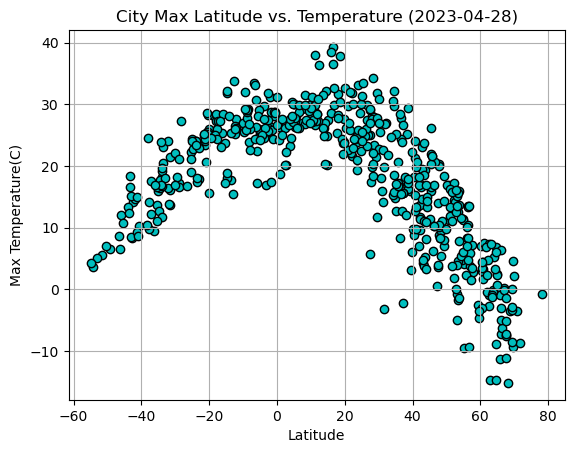

In [9]:
# Build scatter plot for latitude vs. temperature
temp_lat = city_data_df['Lat']
max_temp = city_data_df['Max Temp']

plt.scatter(temp_lat, max_temp, marker="o", facecolors="c", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Max Latitude vs. Temperature ({std_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

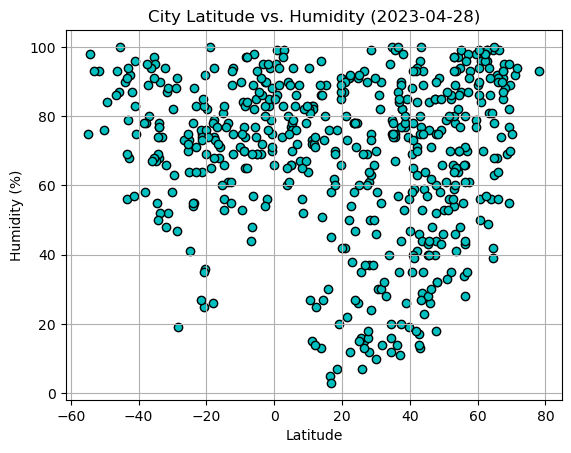

In [10]:
# Build the scatter plots for latitude vs. humidity
hum_lat = city_data_df['Lat']
humidity = city_data_df['Humidity']

plt.scatter(hum_lat, humidity, marker="o", facecolors="c", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Humidity ({std_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

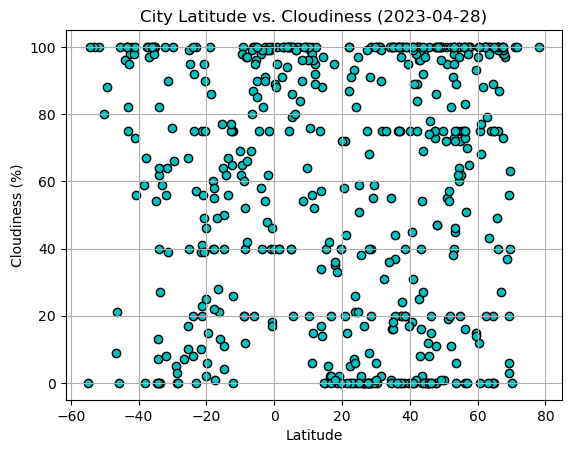

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cl_lat = city_data_df['Lat']
clouds = city_data_df['Cloudiness']

plt.scatter(cl_lat, clouds, marker="o", facecolors="c", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({std_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

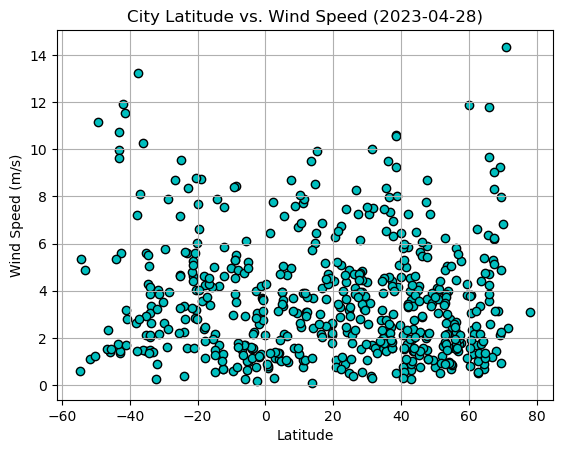

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind_lat = city_data_df['Lat']
wind = city_data_df['Wind Speed']

plt.scatter(wind_lat, wind, marker="o", facecolors="c", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({std_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,perryville,37.7242,-89.8612,17.16,77,100,3.00,US,1682704800
1,tralee,52.2704,-9.7026,14.50,85,82,1.65,IE,1682704800
4,bethel,41.3712,-73.4140,13.39,59,0,4.99,US,1682704800
8,abong mbang,3.9833,13.1833,23.27,80,100,1.37,CM,1682704800
9,fortuna,40.5982,-124.1573,21.21,58,18,2.11,US,1682704800


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,chonchi,-42.6128,-73.8092,14.10,92,98,5.59,CL,1682704800
3,queanbeyan,-35.3500,149.2333,13.65,97,100,1.46,AU,1682704800
5,port mathurin,-19.6833,63.4167,25.90,82,6,6.62,MU,1682704800
6,port-aux-francais,-49.3500,70.2167,6.53,84,88,11.17,TF,1682704800
7,port alfred,-33.5906,26.8910,20.49,90,27,3.37,ZA,1682704800


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8452305129043222


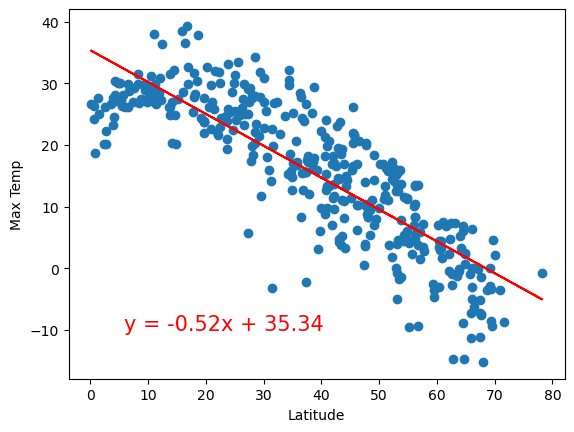

In [16]:
# Linear regression on Northern Hemisphere
n_lat_x = northern_hemi_df['Lat']
n_temp_y = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_x, n_temp_y)
regress_values = n_lat_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat_x, n_temp_y)
plt.plot(n_lat_x,regress_values,"r-")
plt.annotate(line_eq,(5.8,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.819412903399329


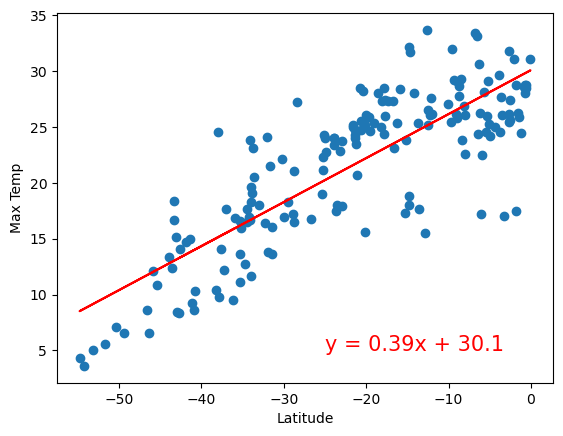

In [17]:
# Linear regression on Southern Hemisphere
s_lat_x = southern_hemi_df['Lat']
s_temp_y = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_x, s_temp_y)
regress_values = s_lat_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat_x, s_temp_y)
plt.plot(s_lat_x,regress_values,"r-")
plt.annotate(line_eq,(-25,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** We can confidently say that there is a correlation between temperature and distance from the equator. The larger your number of latitude, the smaller your max temp. This goes for both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12514110213469992


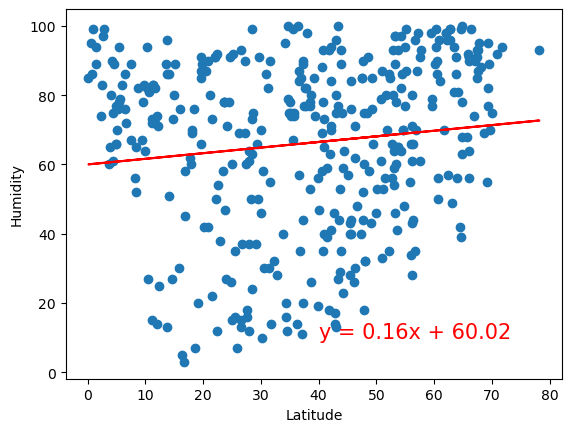

In [18]:
# Northern Hemisphere
n_lat_x = northern_hemi_df['Lat']
n_hum_y = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_x, n_hum_y)
regress_values = n_lat_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat_x, n_hum_y)
plt.plot(n_lat_x,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.0706190037746841


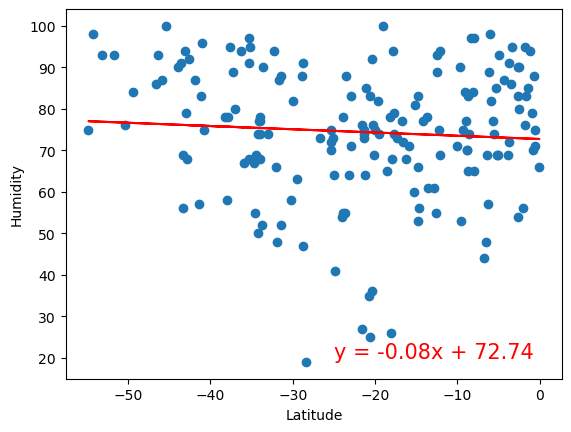

In [19]:
# Southern Hemisphere
s_lat_x = southern_hemi_df['Lat']
s_hum_y = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_x, s_hum_y)
regress_values = s_lat_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat_x, s_hum_y)
plt.plot(s_lat_x,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** We cannot confidently say that there is any sort of correlation between humidity and distance from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05450264571283547


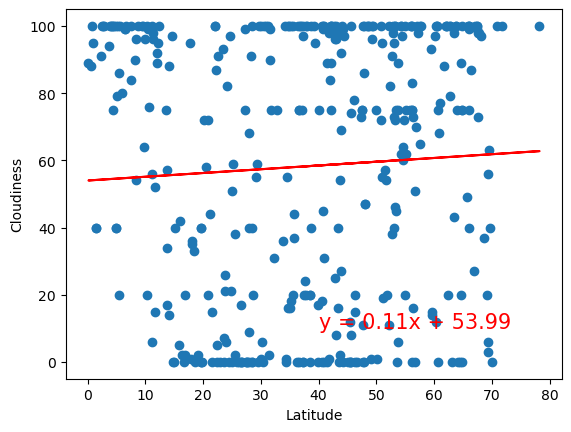

In [20]:
# Northern Hemisphere
n_lat_x = northern_hemi_df['Lat']
n_cld_y = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_x, n_cld_y)
regress_values = n_lat_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat_x, n_cld_y)
plt.plot(n_lat_x,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.010477673768588264


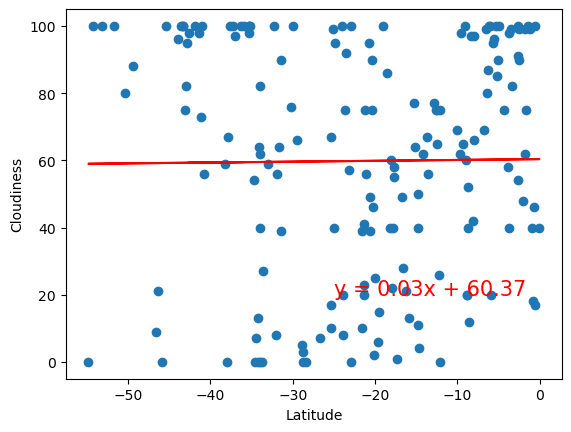

In [21]:
# Southern Hemisphere
s_lat_x = southern_hemi_df['Lat']
s_cld_y = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_x, s_cld_y)
regress_values = s_lat_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat_x, s_cld_y)
plt.plot(s_lat_x,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** We cannot confidently say that there is any sort of correlation between cloudiness and distance from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.015417474253720032


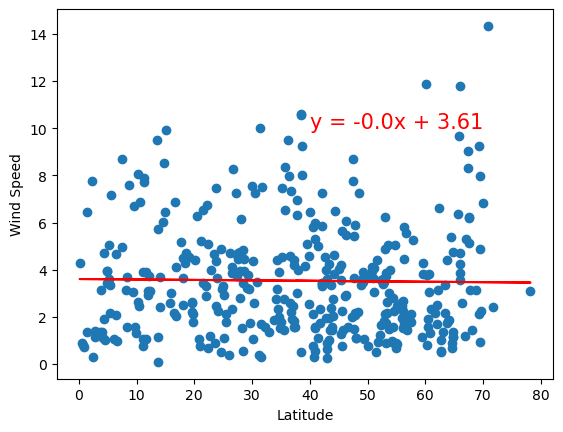

In [22]:
# Northern Hemisphere
n_lat_x = northern_hemi_df['Lat']
n_wind_y = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_x, n_wind_y)
regress_values = n_lat_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(n_lat_x, n_wind_y)
plt.plot(n_lat_x,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.218233248986651


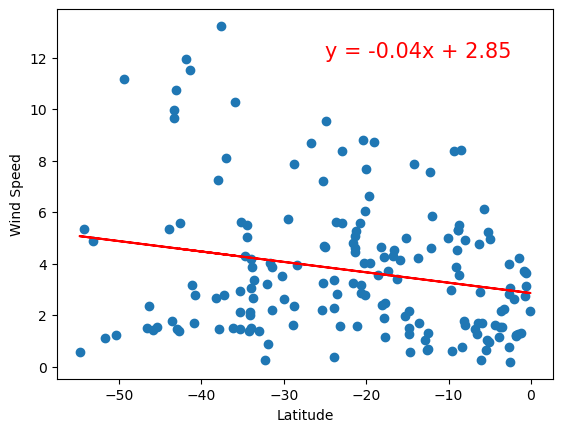

In [23]:
# Southern Hemisphere
s_lat_x = southern_hemi_df['Lat']
s_wind_y = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_x, s_wind_y)
regress_values = s_lat_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(s_lat_x, s_wind_y)
plt.plot(s_lat_x,regress_values,"r-")
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** We cannot confidently say there is any sort of relationship between wind speed and distance from the equator.